In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [10]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y=pd.DataFrame(iris.target, columns=['species'])


In [11]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y ,test_size=0.3, random_state=1)

In [14]:
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=tree.predict(X_test)

In [16]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



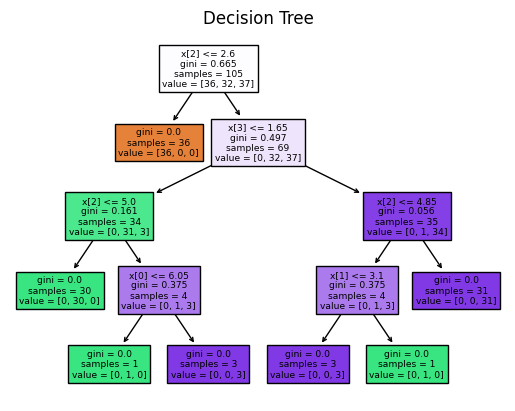

In [21]:
plot_tree(tree, filled=True)
plt.title('Decision Tree')
plt.show()

# **HyperParameter Tuning**

In [22]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best', 'random'],'max_depth':range(1,10),'max_features':['sqrt','log2']}
grid=GridSearchCV(tree,param_grid=params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [23]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
grid_pred=grid.predict(X_test)

In [25]:
grid.best_score_

0.9904761904761905

In [26]:
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

0.9333333333333333
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



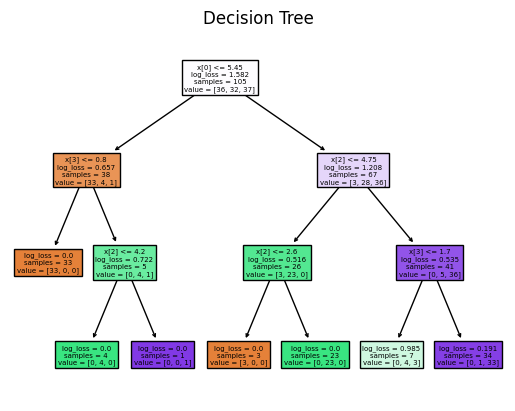

In [27]:
plot_tree(grid.best_estimator_, filled=True)
plt.title('Decision Tree')
plt.show()